In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("D:\\Project\\creditcard.csv")

In [3]:
#peek at the data
data.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
10660    18004.0 -0.701112  0.390777  2.663599 -1.751602 -0.228574 -0.195512   
129814   79219.0 -0.599732  0.670353  2.158036  0.365296  0.315650 -0.863494   
142665   84866.0  1.410486 -1.450460  0.873662 -1.655387 -1.631442  0.547848   
249230  154305.0  1.946020 -0.502366 -0.475467  0.136089 -0.541130 -0.117718   
262821  160661.0 -1.169827  1.904464 -1.179325  0.652808  0.760953  0.022289   

              V7        V8        V9  ...       V21       V22       V23  \
10660   0.339820 -0.097331  2.582883  ... -0.131916  0.195874 -0.338015   
129814  0.671549 -0.281955 -0.561033  ... -0.232409 -0.629944 -0.140812   
142665 -1.761555  0.198888 -1.502612  ...  0.084051  0.568217 -0.205380   
249230 -0.659470  0.188313  0.924044  ... -0.220689 -0.690175  0.473794   
262821  0.478069  0.828969 -0.923547  ...  0.193862  0.562316 -0.208673   

             V24       V25       V26       V27       V28  Amount  Class  
10660   0.022478  0.386283 -0.812102 -0.068123 -0.155810   11.85      0  
129814  0.376562  0.013031  0.200396 -0.145911 -0.144575    0.89      0  
142665 -0.805999  0.333020  0.006567  0.073382  0.025660   59.50      0  
249230  0.720137 -0.706819  0.179261 -0.057800 -0.046694   19.89      0  
262821  0.223285  0.150376 -0.400867  0.150996  0.164767    4.99      0  

[5 rows x 31 columns]

In [4]:
#shape
print("This data frame has {} rows and {} columns.".format(data.shape[0],data.shape[1]))

This data frame has 284807 rows and 31 columns.


In [5]:
#information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#numerical summary -> only non-anonymized columns of interest
p=pd.set_option("precision",3)
data.loc[:,['Time','Amount']].describe()

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

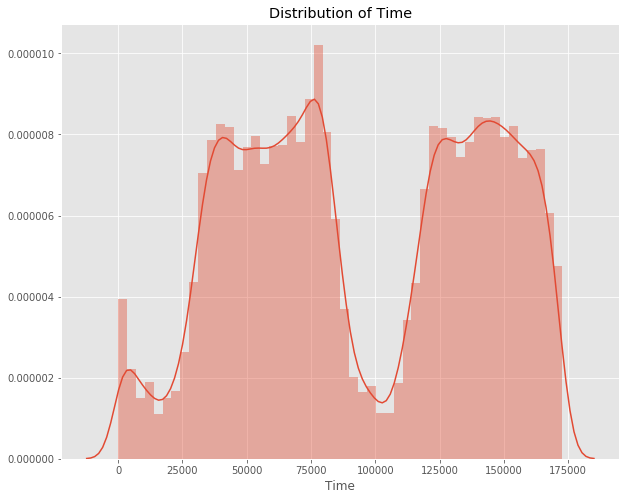

In [7]:
#visualization of time and amount
plt.figure(figsize=(10,8))
plt.title("Distribution of Time")
sns.distplot(data.Time)

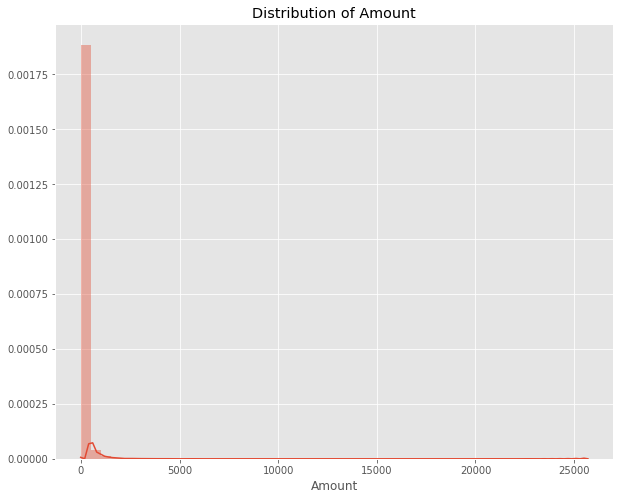

In [8]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Amount")
sns.distplot(data.Amount)

This shows the maximum amount transactin this account is 25691 approx and it has seen that mean of all transactions in this credit card is 88 dollars.

In [9]:
#fraud vs normal transactions
normal = data[data['Class']==0]
fraudulent = data[data['Class']==1]
outlier_fraction = len(fraudulent)/float(len(normal))
print(outlier_fraction)
print('Normal Transcations are {}'.format(len(normal)))
print('Fraud Transactions are {}'.format(len(fraudulent)))


0.0017304750013189597
Normal Transcations are 284315
Fraud Transactions are 492


In [10]:
print("Amount details of fraudulent transactions")
fraudulent.Amount.describe()

Amount details of fraudulent transactions


count     492.000
mean      122.211
std       256.683
min         0.000
25%         1.000
50%         9.250
75%       105.890
max      2125.870
Name: Amount, dtype: float64

In [11]:
print("Amount details of normal transactions")
normal.Amount.describe()

Amount details of normal transactions


count    284315.000
mean         88.291
std         250.105
min           0.000
25%           5.650
50%          22.000
75%          77.050
max       25691.160
Name: Amount, dtype: float64

In [12]:
# we will plot correlation matirx
corr_mat = data.corr()
corr_mat

Time         V1         V2         V3         V4         V5  \
Time    1.000  1.174e-01 -1.059e-02 -4.196e-01 -1.053e-01  1.731e-01   
V1      0.117  1.000e+00  4.697e-17 -1.424e-15  1.755e-17  6.391e-17   
V2     -0.011  4.697e-17  1.000e+00  2.512e-16 -1.126e-16 -2.040e-16   
V3     -0.420 -1.424e-15  2.512e-16  1.000e+00 -3.417e-16 -1.437e-15   
V4     -0.105  1.755e-17 -1.126e-16 -3.417e-16  1.000e+00 -1.941e-15   
V5      0.173  6.391e-17 -2.040e-16 -1.437e-15 -1.941e-15  1.000e+00   
V6     -0.063  2.398e-16  5.025e-16  1.432e-15 -2.713e-16  7.926e-16   
V7      0.085  1.992e-15  3.966e-16  2.169e-15  1.556e-16 -4.210e-16   
V8     -0.037 -9.491e-17 -4.414e-17  3.433e-16  5.196e-16  7.589e-16   
V9     -0.009  2.170e-16 -5.729e-17 -4.234e-16  3.860e-16  4.205e-16   
V10     0.031  7.434e-17 -4.782e-16  6.289e-16  6.055e-16 -6.602e-16   
V11    -0.248  2.439e-16  9.469e-16 -5.502e-17 -2.084e-16  7.343e-16   
V12     0.124  2.422e-16 -6.588e-16  2.207e-16 -5.658e-16  3.761e-16   
V13    -0.066 -2.115e-16  3.855e-16 -6.883e-16 -1.506e-16 -9.579e-16   
V14    -0.099  9.353e-16 -2.541e-16  4.271e-16 -8.522e-17 -3.635e-16   
V15    -0.183 -3.252e-16  2.831e-16  1.123e-16 -1.508e-16 -5.133e-16   
V16     0.012  6.309e-16  4.934e-17  1.183e-15 -6.939e-16 -3.517e-16   
V17    -0.073 -5.012e-16 -9.883e-16  4.577e-17 -4.398e-16  1.426e-16   
V18     0.090  2.870e-16  2.637e-16  5.428e-16  1.494e-16  1.110e-15   
V19     0.029  1.818e-16  9.528e-17  2.577e-16 -2.657e-16 -3.138e-16   
V20    -0.051  1.037e-16 -9.310e-16 -9.429e-16 -3.223e-16  2.076e-16   
V21     0.045 -1.755e-16  8.444e-17 -2.972e-17 -9.977e-17 -1.369e-16   
V22     0.144  7.477e-17  2.501e-16  4.648e-16  2.100e-16  5.060e-16   
V23     0.051  9.809e-16  1.060e-16  2.115e-17  6.003e-17  1.638e-16   
V24    -0.016  7.354e-17 -8.142e-18 -9.352e-17  2.230e-16 -9.286e-16   
V25    -0.233 -9.805e-16 -4.262e-17  4.771e-16  5.395e-16  5.625e-16   
V26    -0.041 -8.622e-17  2.602e-16  6.522e-16 -6.180e-16  9.145e-16   
V27    -0.005  3.208e-17 -4.478e-16  6.240e-16 -6.403e-17  4.466e-16   
V28    -0.009  9.821e-16 -3.676e-16  7.727e-16 -5.864e-17 -3.299e-16   
Amount -0.011 -2.277e-01 -5.314e-01 -2.109e-01  9.873e-02 -3.864e-01   
Class  -0.012 -1.013e-01  9.129e-02 -1.930e-01  1.334e-01 -9.497e-02   

               V6         V7         V8         V9  ...        V21        V22  \
Time   -6.302e-02  8.471e-02 -3.695e-02 -8.660e-03  ...  4.474e-02  1.441e-01   
V1      2.398e-16  1.992e-15 -9.491e-17  2.170e-16  ... -1.755e-16  7.477e-17   
V2      5.025e-16  3.966e-16 -4.414e-17 -5.729e-17  ...  8.444e-17  2.501e-16   
V3      1.432e-15  2.169e-15  3.433e-16 -4.234e-16  ... -2.972e-17  4.648e-16   
V4     -2.713e-16  1.556e-16  5.196e-16  3.860e-16  ... -9.977e-17  2.100e-16   
V5      7.926e-16 -4.210e-16  7.589e-16  4.205e-16  ... -1.369e-16  5.060e-16   
V6      1.000e+00  1.429e-16 -1.707e-16  1.114e-16  ... -1.576e-16 -3.363e-16   
V7      1.429e-16  1.000e+00 -8.692e-17  7.933e-16  ...  1.939e-16 -1.058e-15   
V8     -1.707e-16 -8.692e-17  1.000e+00  2.901e-16  ... -2.412e-16  5.476e-16   
V9      1.114e-16  7.933e-16  2.901e-16  1.000e+00  ...  4.578e-17  2.872e-17   
V10     2.851e-16  3.043e-17  9.052e-17 -2.772e-16  ...  8.090e-16 -6.708e-16   
V11     4.866e-16 -1.084e-15  1.955e-16  4.682e-16  ... -3.912e-16 -3.812e-17   
V12     2.141e-16  1.510e-15 -6.266e-17 -2.445e-15  ...  3.230e-16 -5.904e-16   
V13    -2.268e-16 -9.892e-17 -2.383e-16 -2.650e-16  ...  9.499e-17 -2.660e-17   
V14     3.453e-16 -1.729e-16 -1.131e-16  2.343e-16  ...  1.634e-17  3.440e-16   
V15    -6.368e-18  1.937e-17  2.021e-16 -1.588e-15  ...  1.947e-17 -8.937e-16   
V16    -2.478e-16  2.894e-16  5.027e-16 -3.252e-16  ... -3.927e-16  3.878e-17   
V17     3.568e-16  1.150e-15 -3.509e-16  6.536e-16  ... -7.754e-16 -8.390e-16   
V18     2.811e-16 -1.117e-16 -4.094e-16  1.204e-16  ... -1.141e-15 -8.663e-17   
V19     2.717e-16 -2.874e-16 -5.340e-16  1.121e-16  ...  4.033e-16 -9.690e-16   
V20

Text(0.5, 1, 'Heatmap of correlation')

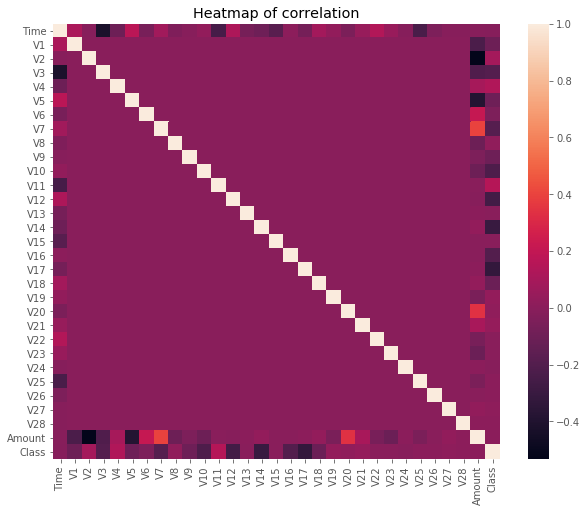

In [13]:
fig = plt.figure(figsize=(10,8))
ax=sns.heatmap(corr_mat)
plt.title("Heatmap of correlation")

In [14]:
#skewness
skew_1=data.skew()
skew_1

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

Scaling Amount and Time

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time column
scaled_time = scaler.fit_transform(data[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time =pd.Series(flat_list1)

In [16]:
#scaling amount column
scaled_amt = scaler.fit_transform(data[['Amount']])
flat_list2 = [item for sublist in scaled_amt.tolist() for item in sublist]
scaled_amt = pd.Series(flat_list2)

Concatenating newly creaated column with original data 

In [17]:
data = pd.concat([data, scaled_amt.rename("Scaled_amount"),scaled_time.rename("Scaled_time")],axis=1)
data.head()

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0   0.0 -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364  ...   
1   0.0  1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255  ...   
2   1.0 -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  ...   
3   1.0 -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387  ...   
4   2.0 -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  ...   

     V23    V24    V25    V26    V27    V28  Amount  Class  Scaled_amount  \
0 -0.110  0.067  0.129 -0.189  0.134 -0.021  149.62      0          0.245   
1  0.101 -0.340  0.167  0.126 -0.009  0.015    2.69      0         -0.342   
2  0.909 -0.689 -0.328 -0.139 -0.055 -0.060  378.66      0          1.161   
3 -0.190 -1.176  0.647 -0.222  0.063  0.061  123.50      0          0.141   
4 -0.137  0.141 -0.206  0.502  0.219  0.215   69.99      0         -0.073   

   Scaled_time  
0       -1.997  
1       -1.997  
2       -1.997  
3       -1.997  
4       -1.997  

[5 rows x 33 columns]

In [18]:
#dropping old column of amount and time
data.drop(["Amount","Time"],axis=1,inplace=True)

In [19]:
#splitting data into train and test
mask = np.random.rand(len(data)) < 0.9
train = data[mask]
test = data[~mask]
print("Train shape {} \nTest shape {}".format(train.shape,test.shape))

Train shape (256346, 31) 
Test shape (28461, 31)


In [20]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

Creating a subsample dataset with balanced class distributions

In [21]:
#how many random sample from normal transactions do we need ?
no_of_frauds = train.Class.value_counts()[1]
print("There are {} fraud transactions in the train data".format(no_of_frauds))

There are 445 fraud transactions in the train data


In [22]:
#randomly selecting 434 non-fraudulent transactions
non_fraud = train[train['Class']==0]
fraud =train[train['Class']==1]

In [23]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
141649  1.430 -0.410 -2.841  1.467  1.724  1.236  0.540  0.136  1.240 -0.789   
13592   1.117 -0.009  0.408  0.526 -0.380 -0.520  0.031 -0.071  0.082 -0.143   
51010  -0.772  0.761  1.183  0.063 -0.804 -0.564  0.225  0.521 -0.561 -0.521   
189790  2.162 -0.803 -1.986 -0.854 -0.053 -0.941  0.004 -0.378 -0.526  0.787   
241624 -1.661  1.898 -0.737 -0.878 -0.439 -0.993  1.151  0.014  1.167  1.395   

        ...    V22    V23    V24    V25    V26    V27    V28  Class  \
141649  ...  0.035 -0.215 -1.131  0.208 -0.474 -0.037 -0.013      0   
13592   ... -0.690  0.126  0.085  0.095  0.224 -0.032  0.023      0   
51010   ...  0.888  0.032  0.543 -0.422  0.387 -0.038  0.087      0   
189790  ...  0.635 -0.020  0.653  0.351 -0.024 -0.072 -0.064      0   
241624  ... -0.732  0.176 -0.060 -0.175  0.154  0.678  0.161      0   

        Scaled_amount  Scaled_time  
141649          0.690        0.318  
13592          -0.130       -1.438  
51010          -0.078       -0.994  
189790         -0.116        0.912  
241624          0.007        1.440  

[5 rows x 31 columns]

In [24]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [25]:
subsample = pd.concat([selected,fraud])
len(subsample)

890

In [26]:
#shuffling our dataset
subsample =subsample.sample(frac=1).reset_index(drop=True)
subsample.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -0.441  0.421  1.854  0.374 -0.399  0.016  0.316  0.189  0.416 -0.673  ...   
1 -0.466  1.546  1.615  2.640  0.937  1.356  0.590 -0.209  0.815  1.565  ...   
2 -0.163  0.142 -0.836  0.014  1.331 -0.228  0.560  0.097  0.067 -1.044  ...   
3  2.101 -1.033 -0.492 -0.976 -1.014 -0.332 -1.029  0.024 -0.152  0.871  ...   
4 -1.348  2.523 -0.782  4.083 -0.662 -0.599 -1.944 -0.330 -1.853 -3.162  ...   

     V22    V23    V24    V25    V26    V27    V28  Class  Scaled_amount  \
0  0.625  0.103 -0.077 -0.684 -0.799  0.233  0.216      0         -0.070   
1  0.137 -0.376 -0.972 -0.109  0.227  0.290 -0.127      0         -0.346   
2  0.032  0.349  0.083 -1.289 -0.158  0.262  0.324      0         -0.031   
3 -0.077  0.308 -0.433 -0.484 -0.483  0.004 -0.050      0         -0.225   
4 -0.352 -0.218  0.126 -0.074  0.179  0.613  0.234      1         -0.349   

   Scaled_time  
0        1.014  
1       -1.658  
2        1.102  
3        1.093  
4       -0.640  

[5 rows x 31 columns]

Text(0.5, 0, 'Class(0:Non-fraudulent, 1:fraudulent)')

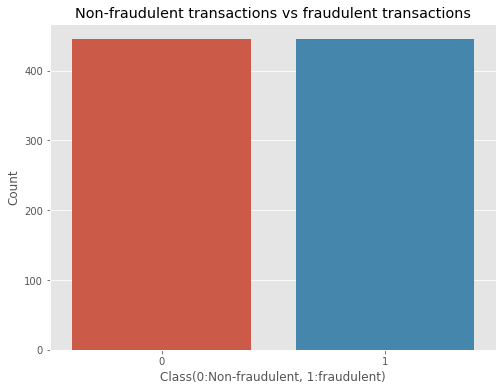

In [27]:
new_count = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_count.index, y=new_count)
plt.title("Non-fraudulent transactions vs fraudulent transactions")
plt.ylabel("Count")
plt.xlabel("Class(0:Non-fraudulent, 1:fraudulent)")

In [28]:
#taking look at correlation once again
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -0.445
V2             0.490
V3            -0.570
V4             0.709
V5            -0.381
V6            -0.422
V7            -0.474
V8             0.068
V9            -0.551
V10           -0.628
V11            0.685
V12           -0.685
V13           -0.047
V14           -0.745
V15           -0.041
V16           -0.599
V17           -0.553
V18           -0.469
V19            0.244
V20            0.181
V21            0.125
V22            0.006
V23           -0.033
V24           -0.065
V25           -0.011
V26            0.011
V27            0.085
V28            0.102
Class          1.000
Scaled_amount  0.128
Scaled_time   -0.121

In [29]:
#Negative correlations lower than -0.5
corr[corr.Class < -0.5]

Class
V3  -0.570
V9  -0.551
V10 -0.628
V12 -0.685
V14 -0.745
V16 -0.599
V17 -0.553

In [30]:
#positive correlatons greater that 0.5
corr[corr.Class > 0.5]

Class
V4     0.709
V11    0.685
Class  1.000

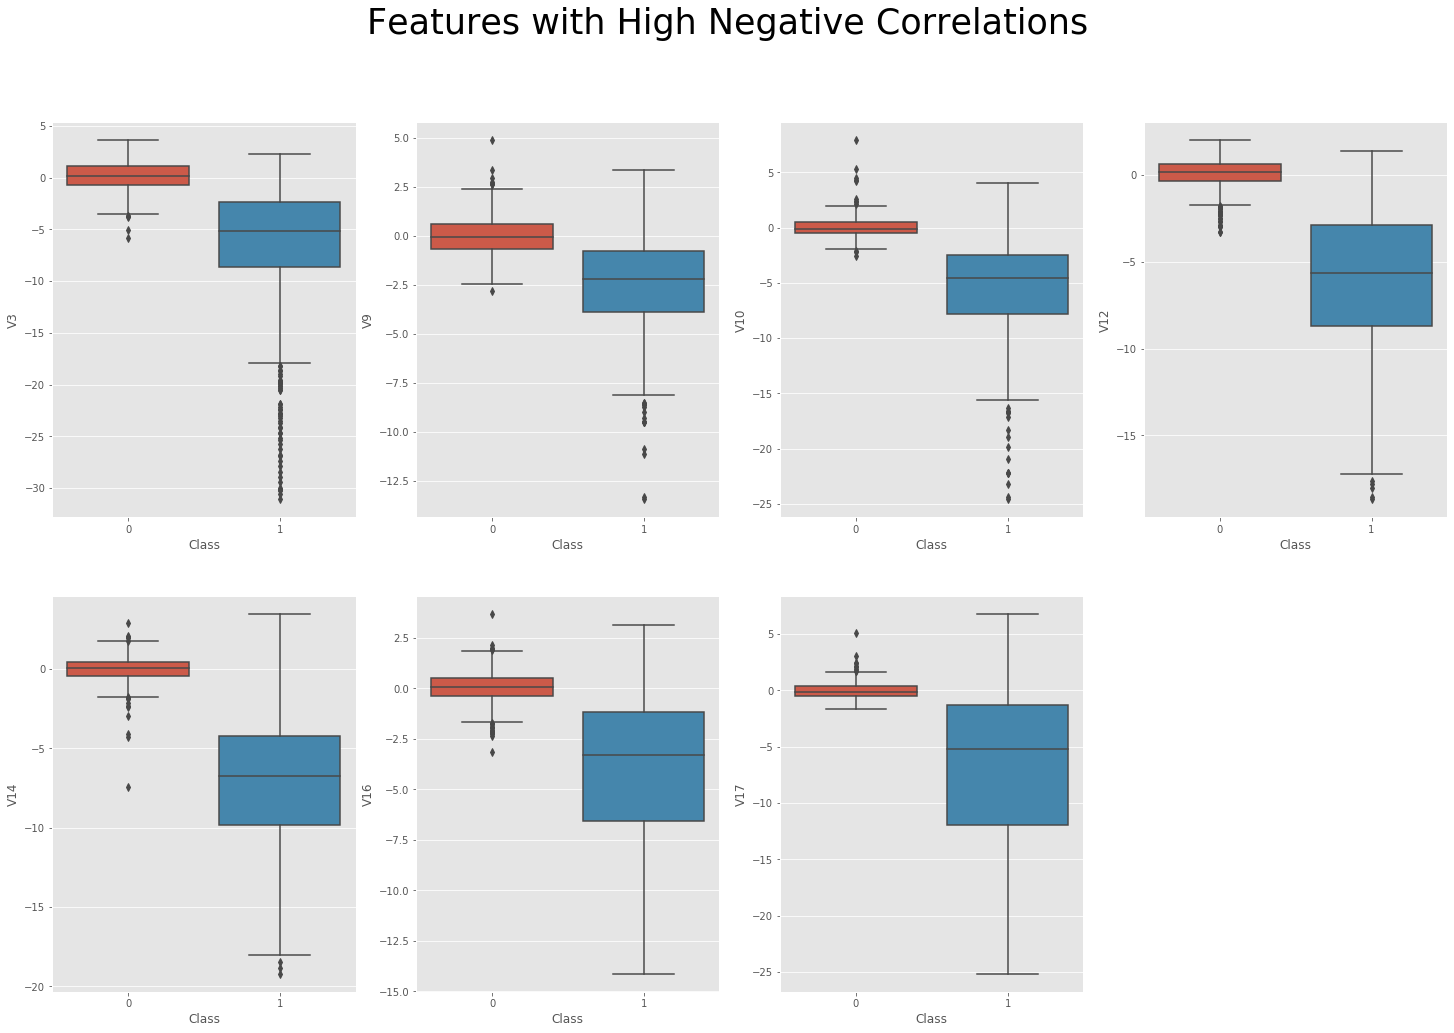

In [31]:
#vizualising the features with high negative correlations
f,axes = plt.subplots(nrows=2,ncols=4,figsize=(25,16))

f.suptitle("Features with High Negative Correlations", size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

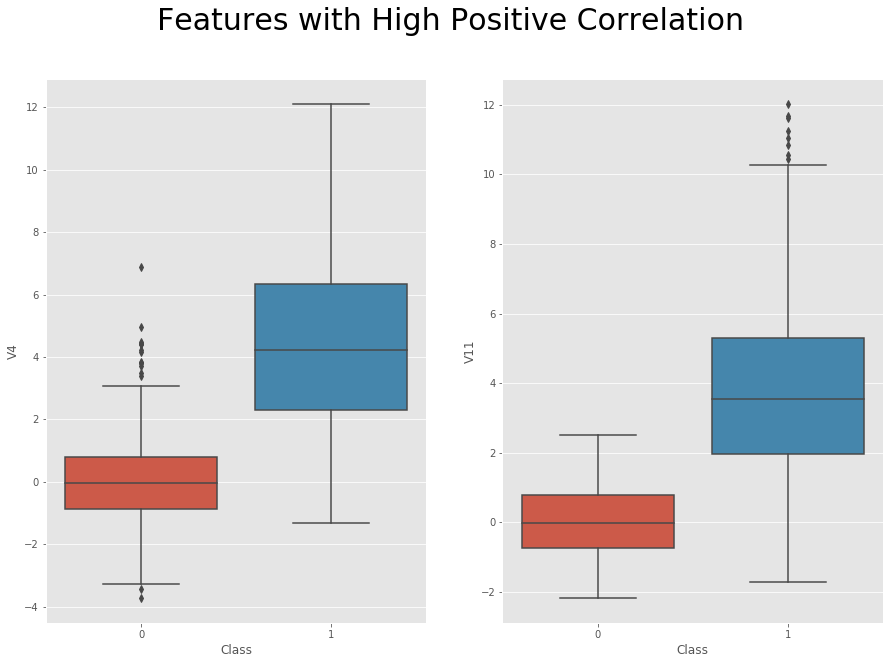

In [32]:
#vizualizing the features with high positive correlations
f, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))

f.suptitle("Features with High Positive Correlation", size=30)
sns.boxplot(x="Class",y="V4",data=subsample,ax=axes[0])
sns.boxplot(x="Class",y="V11",data=subsample,ax=axes[1])


Extreme Outlier Removal

In [33]:
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)

IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) | (subsample > (Q3 + 2.5 *IQR))).any(axis=1)]

In [34]:
length_after = len(df2)
length_before = len(subsample)
length_difference = len(subsample) - len(df2)
print("We reduced our data size from {} transactions by {} transactions  to {} transactions.".format(length_before,length_difference,length_after))

We reduced our data size from 890 transactions by 262 transactions  to 628 transactions.


Dimensionality Reduction

In [35]:
from sklearn.manifold import TSNE
X = df2.drop('Class',axis=1)
y = df2['Class']

In [36]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

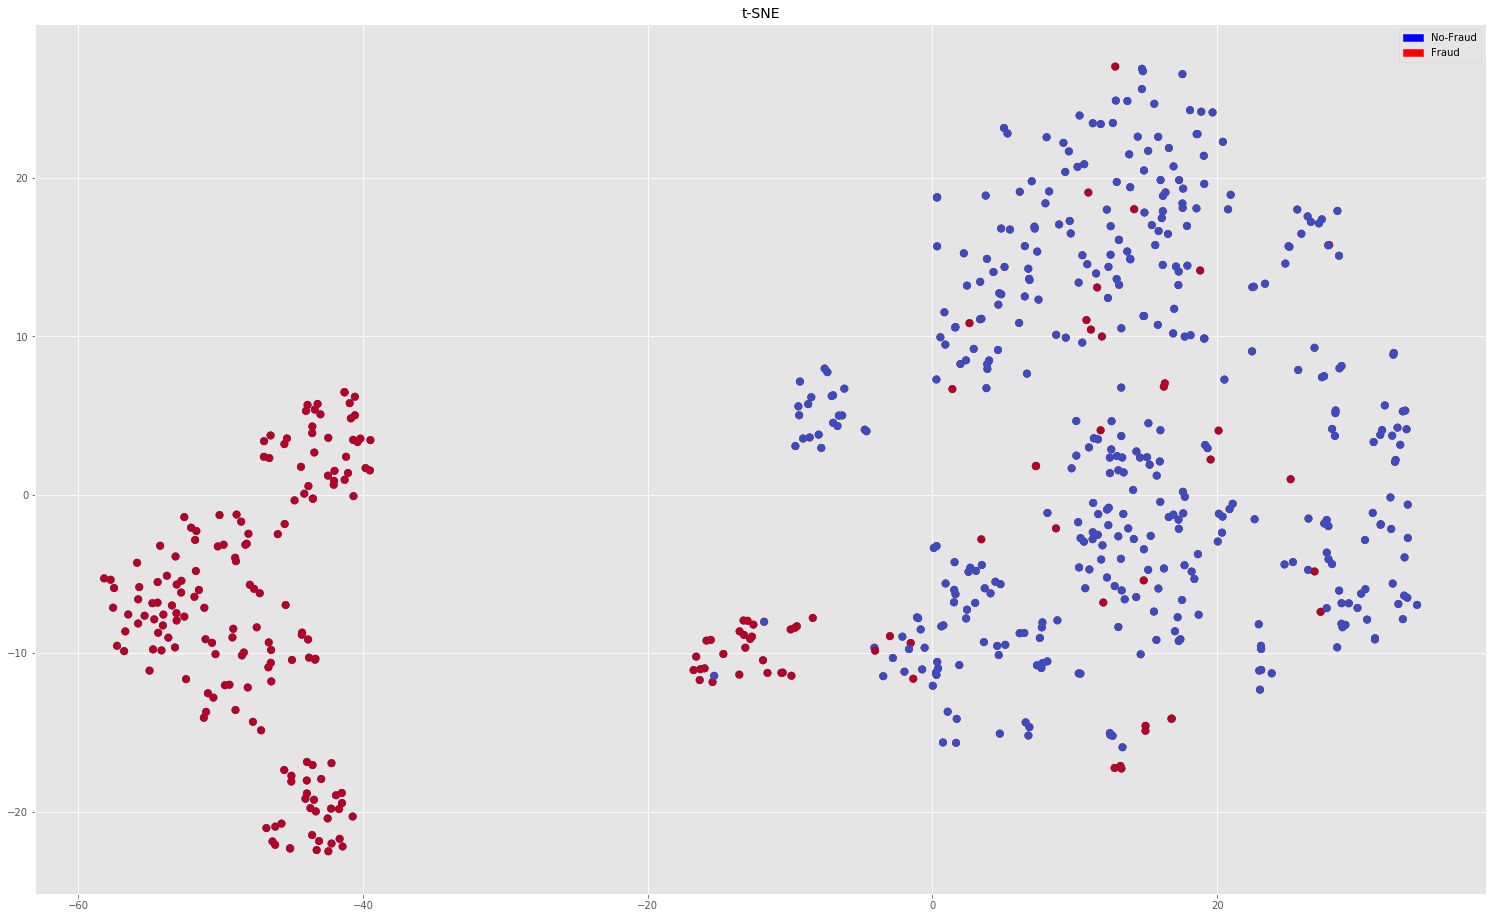

In [37]:
#t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax=plt.subplots(figsize=(26,16))

blue_p = mpatches.Patch(color="blue",label="No-Fraud")
red_p = mpatches.Patch(color="red",label="Fraud")

ax.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1] , c=(y==0) , cmap='coolwarm',label = "No-Fraud",linewidths=2)
ax.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1] , c=(y==1) , cmap='coolwarm',label = "Fraud",linewidths=2)

ax.set_title('t-SNE', fontsize=14)

ax.grid(True)
ax.legend(handles=[blue_p,red_p])

Classification Algorithms

In [38]:
def warn (*args,**kwargs):
    pass
import warnings
warnings.warn =warn


In [39]:
#train_test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [40]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values


In [41]:
print("X_shape:\n" , "X_Train:" , X_train.shape , "\nX_Validation:" ,X_validation.shape ,"\n")
print("Y-shape:\n" , "Y_Train:", y_train.shape , "\nY_Validation:" , y_validation.shape )

X_shape:
 X_Train: (502, 30) 
X_Validation: (126, 30) 

Y-shape:
 Y_Train: (502,) 
Y_Validation: (126,)


In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Spot-checking Algorithm

models = []

models.append(("LR",LogisticRegression()))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))

#testing_models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s:%f(%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR:0.968873(0.029621)
LDA:0.968468(0.030413)
KNN:0.945954(0.028277)
DT:0.914532(0.031033)
SVM:0.970126(0.027402)
XGB:0.971507(0.018535)
RF:0.974451(0.016009)


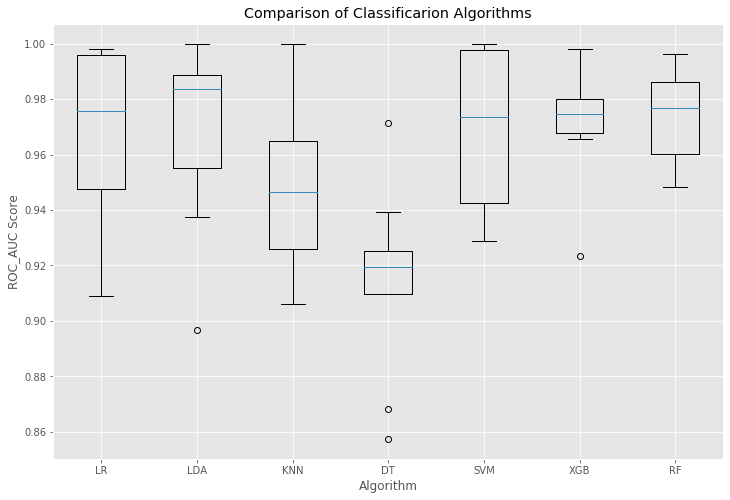

In [44]:
#Compare Algorithms
fig = plt.figure(figsize=(12,8))
plt.title('Comparison of Classificarion Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC_AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()